<a href="https://colab.research.google.com/github/Tanjida37/Weather-Data-Analysis-Tool/blob/main/Weather_Data_Analysis_Tool(PP_03_01).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
#Load CSV File
print('Load CSV File')
import csv
with open('/content/weather_data_monthly.csv', 'r') as file:
    csv_reader = csv.reader(file)
    header = next(csv_reader)  # Extract header
    data = [row for row in csv_reader]  # Extract rows
print("Header:", header)
print("Data:")
for row in data:
    print(row)
#Data Manipulation
print('Data Manipulation')
first_row = data[0]
print(first_row)
temperatures = [row[1] for row in data[0:]]
print(temperatures)
temperatures = [float(temp) for temp in temperatures]
print(temperatures)

Load CSV File
Header: ['Date', 'Temperature (°C)', 'Rainfall (mm)', 'Humidity (%)', 'Wind Speed (km/h)', 'Condition']
Data:
['1/1/2024', '24.1', '74.8', '45', '88.7', 'Rainy with Storm']
['1/2/2024', '18', '56.6', '62', '7', 'Cloudy']
['1/3/2024', '36', '58', '88', '7.9', 'Sunny with Heatwave']
['1/4/2024', '29.5', '49.9', '63', '13.5', 'Rainy']
['1/5/2024', '20.9', '92.6', '56', '11.2', 'Stormy']
['1/6/2024', '24.6', '70.1', '64', '10.6', 'Windy']
['1/7/2024', '25.5', '42', '87', '12', 'Stormy']
['1/8/2024', '23.8', '62.2', '55', '26.3', 'Windy']
['1/9/2024', '13.2', '24.9', '36', '25.7', 'Stormy']
['1/10/2024', '40.4', '61.5', '42', '20.4', 'Sunny with Heatwave']
['1/11/2024', '42.8', '62.7', '86', '14.9', 'Sunny with Heatwave']
['1/12/2024', '20.8', '16.7', '34', '7.2', 'Stormy']
['1/13/2024', '21', '61.7', '88', '92.6', 'Rainy with Storm']
['1/14/2024', '24.7', '95.7', '51', '17', 'Stormy']
['1/15/2024', '31.7', '23', '83', '9.5', 'Rainy']
['1/16/2024', '30.9', '67', '63', '25.7', 

In [ ]:
#import new weather data
file_name = input("New_weather Data:")
try:
    with open(file_name, mode='r') as file:
        csv_reader = csv.reader(file)
        header = next(csv_reader)
        data = [row for row in csv_reader]
        print("new_data_imported.")
        print("Header:", header)
        print("Data:")
        for row in data:
            print(row)
except FileNotFoundError:
    print("Error: File not found. Starting with empty data.")
    header = ["Date", "Temperature(°C)", "Rainfall(mm)", "Humidity(%)", "Wind Speed(km/h)", "Condition"]
    data = []

New_weather Data:/content/New_Weather_Data.csv
new_data_imported.
Header: ['Date', 'Temperature(°C)', 'Rainfall(mm)', 'Humidity(%)', 'Wind Speed(km/h)', 'Condition']
Data:
['1/4/2024', '28', '3', '65', '12', 'Cloudy']
['1/5/2024', '26', '10', '70', '15', 'Rainy']
['1/6/2024', '32', '0', '50', '8', 'Sunny']


In [ ]:
#Validation and replacing missing values:
from datetime import datetime

# Function to validate and clean a single row
def validate_and_clean_row(row):
    try:
        # Validate and clean Date
        datetime.strptime(row[0], "%m/%d/%Y")  # Validate date format
    except (ValueError, IndexError):
        row[0] = "01/01/2000"  # Default date

    # Validate and clean numerical fields
    for i in range(1, len(row)):
        try:
            row[i] = float(row[i])  # Convert valid numbers to float
        except (ValueError, IndexError):
            row[i] = None  # Set invalid/missing values to None

    return row

# Step 2: Add New Data
def add_new_data(data):
    print("Enter new weather data:")
    new_row = []
    new_row.append(input("Date (MM/DD/YYYY): "))  # Date input
    new_row.append(input("Temperature (\u00b0C): "))  # Temperature input
    new_row.append(input("Rainfall (mm): "))       # Rainfall input
    new_row.append(input("Humidity (%): "))        # Humidity input
    new_row.append(input("Wind Speed (km/h): "))   # Wind Speed input
    new_row.append(input("Condition: "))           # Condition input (free text)
    validated_row = validate_and_clean_row(new_row)
    data.append(validated_row)
    print("New data added and validated!")

data = []
add_new_data(data)
print(data)

Enter new weather data:
Date (MM/DD/YYYY): 2024/09/13
Temperature (°C): 21
Rainfall (mm): 
Humidity (%): 61
Wind Speed (km/h): 11
Condition: 
New data added and validated!
[['01/01/2000', 21.0, None, 61.0, 11.0, None]]


In [ ]:
#Calculating averages
import csv
from datetime import datetime

def calculate_weather_averages(file_path, start_date_str, end_date_str):

    start_date = datetime.strptime(start_date_str, '%m/%d/%Y').date()
    end_date = datetime.strptime(end_date_str, '%m/%d/%Y').date()


    temperatures = []
    rainfalls = []
    humidities = []

    with open(file_path, 'r') as file:
        reader = csv.reader(file)
        next(reader)

        for row in reader:
            try:

                date_str = row[0]
                temperature = float(row[1])
                rainfall = float(row[2])
                humidity = float(row[3])


                date = datetime.strptime(date_str, '%m/%d/%Y').date()

                if start_date <= date <= end_date:
                    # Append data to respective lists
                    temperatures.append(temperature)
                    rainfalls.append(rainfall)
                    humidities.append(humidity)

            except (ValueError, IndexError):
                # Skip rows with invalid data or missing values
                continue

    avg_temp = sum(temperatures) / len(temperatures) if temperatures else 0
    avg_rainfall = sum(rainfalls) / len(rainfalls) if rainfalls else 0
    avg_humidity = sum(humidities) / len(humidities) if humidities else 0


    return avg_temp, avg_rainfall, avg_humidity

file_path = '/content/weather_data_monthly.csv'
start_date_str = '12/01/2024'  # Start date in 'MM/DD/YYYY' format
end_date_str = '12/31/2024'  # End date in 'MM/DD/YYYY' format

avg_temp, avg_rainfall, avg_humidity = calculate_weather_averages(
    file_path, start_date_str, end_date_str
)

print(f"Average Temperature: {avg_temp} °C")
print(f"Average Rainfall: {avg_rainfall} mm")
print(f"Average Humidity: {avg_humidity} %")

Average Temperature: 28.593548387096774 °C
Average Rainfall: 46.92258064516129 mm
Average Humidity: 67.96774193548387 %


In [ ]:
#Extreme Values
import csv
from datetime import datetime
def find_extreme_weather_days(file_path):
    with open(file_path, 'r') as file:
        reader = csv.reader(file)
        next(reader)  # Skip header
        # Store data in lists for easy access
        dates = []
        temperatures = []
        rainfalls = []
        for row in reader:
            try:
                dates.append(datetime.strptime(row[0], '%m/%d/%Y').date())
                temperatures.append(float(row[1]))
                rainfalls.append(float(row[2]))
            except (ValueError, IndexError):
                continue
        # Find indices of extreme values
        max_temp_index = temperatures.index(max(temperatures))
        min_temp_index = temperatures.index(min(temperatures))
        max_rain_index = rainfalls.index(max(rainfalls))
        min_rain_index = rainfalls.index(min(rainfalls))
        # Print the results
        print(f"Highest Temperature: {temperatures[max_temp_index]:.2f} °C on {dates[max_temp_index].strftime('%m/%d/%Y')}")
        print(f"Lowest Temperature: {temperatures[min_temp_index]:.2f} °C on {dates[min_temp_index].strftime('%m/%d/%Y')}")
        print(f"Highest Rainfall: {rainfalls[max_rain_index]:.2f} mm on {dates[max_rain_index].strftime('%m/%d/%Y')}")
        print(f"Lowest Rainfall: {rainfalls[min_rain_index]:.2f} mm on {dates[min_rain_index].strftime('%m/%d/%Y')}")


# Example usage
file_path = '/content/weather_data_monthly.csv'
find_extreme_weather_days(file_path)

Highest Temperature: 44.60 °C on 02/08/2024
Lowest Temperature: 10.00 °C on 09/20/2024
Highest Rainfall: 99.90 mm on 03/21/2024
Lowest Rainfall: 0.50 mm on 01/22/2024


In [ ]:
#Weather Count
from datetime import datetime
import csv  # Import the csv module

def count_weather_conditions(file_path, month, year):
    counts = {'sunny': 0, 'rainy': 0, 'windy': 0}

    with open(file_path, 'r') as file:  # Open the CSV file
        reader = csv.reader(file)
        next(reader)  # Skip the header row

        for row in reader:  # Iterate through rows from the file
            try:
                date = datetime.strptime(row[0], "%m/%d/%Y")
                if date.month == month and date.year == year:
                    condition = row[-1].lower()
                    if 'sun' in condition:
                        counts['sunny'] += 1
                    elif 'rain' in condition:
                        counts['rainy'] += 1
                    elif 'wind' in condition:
                        counts['windy'] += 1
            except ValueError:  # Handle invalid date formats
                print(f"Skipping row with invalid date format: {row[0]}")
                continue  # Skip to the next row

    return counts

# Example usage:
month = 1  # January
year = 2024
file_path = '/content/weather_data_monthly.csv'
weather_counts = count_weather_conditions(file_path, month, year)
print(f"Weather counts for {month}/{year}: {weather_counts}")

Weather counts for 1/2024: {'sunny': 9, 'rainy': 8, 'windy': 4}


In [ ]:
#Summary_report of weather data
import csv
from datetime import datetime

def weather_stats_for_date_range(file_path, start_date_str, end_date_str):

    try:
        start_date = datetime.strptime(start_date_str, '%m/%d/%Y').date()
        end_date = datetime.strptime(end_date_str, '%m/%d/%Y').date()
    except ValueError:
        print("Invalid date format. Please use MM/DD/YYYY.")
        return

    with open(file_path, 'r') as file:
        reader = csv.reader(file)
        next(reader)  # Skip the header row

        temps = []
        rains = []
        winds = []

        for row in reader:
            try:
                date = datetime.strptime(row[0], '%m/%d/%Y').date()
                if start_date <= date <= end_date:
                    temps.append(float(row[1]))
                    rains.append(float(row[2]))
                    winds.append(float(row[4]))
            except (ValueError, IndexError):
                continue  # Skip rows with invalid or missing data

    weather_elements = {
        "Temperature": temps,
        "Rainfall": rains,
        "Wind Speed": winds
    }

    for element_name, values in weather_elements.items():
        if values:
            average = sum(values) / len(values)
            maximum = max(values)
            minimum = min(values)

            print(f"{element_name}:")
            print(f"  Average: {average:.2f}")
            print(f"  Maximum: {maximum}")
            print(f"  Minimum: {minimum}")
        else:
            print(f"No {element_name} data available for the specified date range.")


# Example usage:
file_path = "/content/weather_data_monthly.csv"
start_date_str = input("Enter start date (MM/DD/YYYY): ")
end_date_str = input("Enter end date (MM/DD/YYYY): ")

weather_stats_for_date_range(file_path, start_date_str, end_date_str)

Enter start date (MM/DD/YYYY): 12/01/2024
Enter end date (MM/DD/YYYY): 12/31/2024
Temperature:
  Average: 28.59
  Maximum: 42.9
  Minimum: 10.5
Rainfall:
  Average: 46.92
  Maximum: 96.4
  Minimum: 4.3
Wind Speed:
  Average: 18.55
  Maximum: 96.6
  Minimum: 6.2


In [3]:
#storm or heatwave
import csv
from datetime import datetime

def find_extreme_weather_days(file_path):
    extreme_days = []

    with open(file_path, 'r') as file:
        reader = csv.reader(file)
        next(reader)  # Skip header row

        for row in reader:
            try:
                date = datetime.strptime(row[0], '%m/%d/%Y').date()
                condition = row[5].lower()  # Convert condition to lowercase

                # Check for storm or heatwave conditions
                if any(keyword in condition for keyword in ['storm', 'heatwave']):
                    extreme_days.append((date, condition))
            except (ValueError, IndexError):
                continue  # Skip rows with invalid or missing data

    if extreme_days:
        print("Days with Storm or Heatwave Conditions:")
        for date, cond in extreme_days:  # Modified print statement
            print(f"{date.strftime('%m/%d/%Y')}: Condition={cond}")
    else:
        print("No days with storm or heatwave conditions found.")

# Example usage
file_path = "/content/weather_data_monthly.csv"
find_extreme_weather_days(file_path)

Days with Storm or Heatwave Conditions:
01/01/2024: Condition=rainy with storm
01/03/2024: Condition=sunny with heatwave
01/05/2024: Condition=stormy
01/07/2024: Condition=stormy
01/09/2024: Condition=stormy
01/10/2024: Condition=sunny with heatwave
01/11/2024: Condition=sunny with heatwave
01/12/2024: Condition=stormy
01/13/2024: Condition=rainy with storm
01/14/2024: Condition=stormy
01/17/2024: Condition=stormy
01/19/2024: Condition=rainy with storm
01/20/2024: Condition=sunny with heatwave
01/26/2024: Condition=sunny with heatwave
01/28/2024: Condition=stormy
01/31/2024: Condition=sunny with heatwave
02/01/2024: Condition=sunny with heatwave
02/02/2024: Condition=sunny with heatwave
02/08/2024: Condition=sunny with heatwave
02/09/2024: Condition=rainy with storm
02/11/2024: Condition=sunny with heatwave
02/14/2024: Condition=stormy
02/15/2024: Condition=sunny with heatwave
02/16/2024: Condition=sunny with heatwave
02/19/2024: Condition=sunny with heatwave
02/23/2024: Condition=sunn

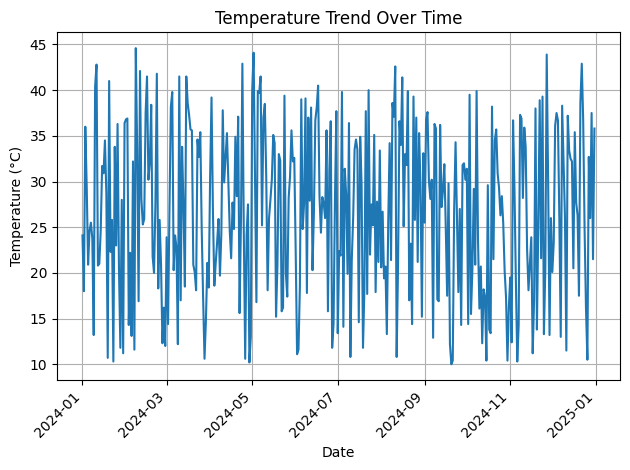

In [ ]:
#Line chart
import csv
from datetime import datetime
import matplotlib.pyplot as plt

def visualize_temperature_trend(file_path):
    """Visualizes temperature trends over time using a line chart."""

    dates = []
    temperatures = []

    with open(file_path, 'r') as file:
        reader = csv.reader(file)
        next(reader)  # Skip header row

        for row in reader:
            try:
                dates.append(datetime.strptime(row[0], '%m/%d/%Y').date())
                temperatures.append(float(row[1]))
            except (ValueError, IndexError):
                continue

    # Create the line chart
    plt.plot(dates, temperatures)

    # Customize the chart
    plt.xlabel("Date")
    plt.ylabel("Temperature (°C)")
    plt.title("Temperature Trend Over Time")
    plt.grid(True)  # Add a grid for better readability
    plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility

    # Display the chart
    plt.tight_layout()  # Adjust layout to prevent labels from overlapping
    plt.show()

file_path = "/content/weather_data_monthly.csv"
visualize_temperature_trend(file_path)

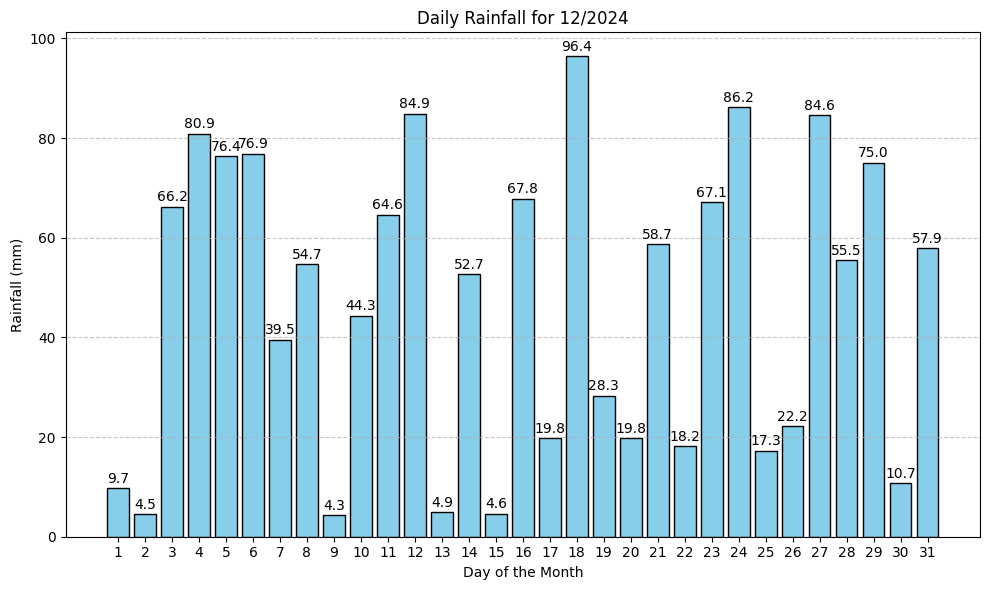

In [ ]:
#Bar chart
import csv
from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np  # Import numpy for numerical operations

def visualize_daily_rainfall(file_path, month, year):
    """Visualizes daily rainfall for a given month using a bar chart."""

    daily_rainfall = {}

    with open(file_path, 'r') as file:
        reader = csv.reader(file)
        next(reader)  # Skip header row

        for row in reader:
            try:
                date = datetime.strptime(row[0], '%m/%d/%Y').date()
                if date.month == month and date.year == year:
                    rainfall = float(row[2])
                    daily_rainfall[date.day] = rainfall
            except (ValueError, IndexError):
                continue

    # Prepare data for the bar chart
    days = list(daily_rainfall.keys())
    rainfall_amounts = list(daily_rainfall.values())

    # Create the bar chart
    plt.figure(figsize=(10, 6))  # Adjust figure size for better visualization
    plt.bar(days, rainfall_amounts, color='skyblue', edgecolor='black')

    # Customize the chart
    plt.xlabel("Day of the Month")
    plt.ylabel("Rainfall (mm)")
    plt.title(f"Daily Rainfall for {month}/{year}")
    plt.xticks(np.arange(1, 32, 1))  # Set x-axis ticks for each day of the month
    plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add a subtle grid to the y-axis

    # Add data labels above the bars (optional)
    for i, v in enumerate(rainfall_amounts):
        plt.text(days[i], v + 0.5, str(v), ha='center', va='bottom', color='black')

    # Display the chart
    plt.tight_layout()
    plt.show()


# Example usage
file_path = "/content/weather_data_monthly.csv"  # Replace with your actual file path
month = 12  # December
year = 2024
visualize_daily_rainfall(file_path, month, year)

In [ ]:
#Summary table
import csv
from datetime import datetime
import pandas as pd

def generate_monthly_weather_summary(file_path):
    """Generates a summary table of weather statistics by month."""

    data = []
    with open(file_path, 'r') as file:
        reader = csv.reader(file)
        next(reader)  # Skip header row
        for row in reader:
            try:
                date = datetime.strptime(row[0], '%m/%d/%Y').date()
                temperature = float(row[1])
                rainfall = float(row[2])
                wind_speed = float(row[4])
                data.append([date.year, date.month, temperature, rainfall, wind_speed])
            except (ValueError, IndexError):
                continue

    df = pd.DataFrame(data, columns=['Year', 'Month', 'Temperature', 'Rainfall', 'Wind Speed'])

    # Calculate monthly statistics
    monthly_summary = df.groupby(['Year', 'Month'])[['Temperature', 'Rainfall', 'Wind Speed']].agg(['mean', 'max', 'min'])

    # Format the table
    monthly_summary = monthly_summary.rename(columns={
        'mean': 'Average',
        'max': 'Maximum',
        'min': 'Minimum'
    })

    # Display the table
    print(monthly_summary)

    # (Optional) Save to CSV
    # monthly_summary.to_csv('monthly_weather_summary.csv')



# Example usage
file_path = "/content/weather_data_monthly.csv"  # Replace with your actual file path
generate_monthly_weather_summary(file_path)

           Temperature                   Rainfall                 Wind Speed  \
               Average Maximum Minimum    Average Maximum Minimum    Average   
Year Month                                                                     
2024 1       25.877419    42.8    10.3  57.864516    95.7     0.5  22.938710   
     2       26.886207    44.6    11.6  60.400000    97.9    17.5  23.579310   
     3       26.396774    41.5    10.6  53.348387    99.9     1.2  22.216129   
     4       26.283333    42.9    10.2  52.503333    99.6     1.8  27.933333   
     5       29.816129    44.1    15.2  60.116129    97.5    12.3  19.561290   
     6       27.426667    40.5    11.1  48.283333    98.9     4.1  26.190000   
     7       25.883871    40.0    10.8  42.445161    95.5     2.4  19.345161   
     8       27.896774    42.6    10.8  50.677419    98.4     7.5  30.393548   
     9       25.896667    37.6    10.0  52.096667    98.7     2.0  20.570000   
     10      23.264516    39.9    10.4  

In [ ]:
#Exporting
import pandas as pd
import chardet
import matplotlib.pyplot as plt
from collections import defaultdict
import os
import json

# Function to import and clean weather data from CSV
def import_weather_data(file_path):
    try:
        # Detect file encoding
        with open(file_path, 'rb') as f:
            result = chardet.detect(f.read())
        encoding = result['encoding']

        # Read CSV with detected encoding
        data = pd.read_csv(file_path, encoding=encoding)

        # Basic data cleaning (example: remove rows with missing values)
        data.dropna(inplace=True)

        return data
    except Exception as e:
        print(f"Error importing weather data: {e}")
        return None

# Function to format date columns to remove the time portion
def format_date_columns(data):
    try:
        date_columns = ['Date']  # Replace with actual date column names
        for col in date_columns:
            data[col] = pd.to_datetime(data[col]).dt.date
        return data
    except Exception as e:
        print(f"Error formatting date columns: {e}")
        return None


# Function to export weather data or analysis to CSV
def export_to_csv(data, file_name):
    try:
        data.to_csv(file_name, index=False)
        print(f"Data successfully exported to {file_name}")
    except Exception as e:
        print(f"Error exporting data to CSV: {e}")

# Function to save user-defined analysis configurations to a JSON file
def save_user_config(config, file_name):
    try:
        with open(file_name, 'w') as f:
            json.dump(config, f)
        print(f"User configuration saved to {file_name}")
    except Exception as e:
        print(f"Error saving user configuration: {e}")

# Function to load user-defined analysis configurations from a JSON file
def load_user_config(file_name):
    try:
        if os.path.exists(file_name):
            with open(file_name, 'r') as f:
                config = json.load(f)
            print(f"User configuration loaded from {file_name}")
            return config
        else:
            print("No configuration file found.")
            return None
    except Exception as e:
        print(f"Error loading user configuration: {e}")
        return None

# Function to search weather data by date or condition
def search_weather_data(data, search_date=None, condition=None):
    try:
        if search_date:
            search_date = pd.to_datetime(search_date).date()
            filtered_data = data[data['Date'] == search_date]
        elif condition:
            filtered_data = data[data['Condition'].str.contains(condition, case=False, na=False)]
        else:
            filtered_data = data

        if filtered_data.empty:
            print("No matching data found.")
        else:
            print(filtered_data)
    except Exception as e:
        print(f"Error searching weather data: {e}")

# Example usage
file_path = '/content/weather_data_monthly.csv'  # Replace with your file path
cleaned_weather_data = import_weather_data(file_path)

# Format the date columns to remove the time portion
if cleaned_weather_data is not None:
    cleaned_weather_data = format_date_columns(cleaned_weather_data)



    # Export to CSV example
    export_to_csv(cleaned_weather_data, "weather_report.csv")



Data successfully exported to weather_report.csv


In [ ]:
#Save and Reload
import pandas as pd
import chardet
import matplotlib.pyplot as plt
from collections import defaultdict
import os
import json

# Function to import and clean weather data from CSV
def import_weather_data(file_path):
    try:
        # Detect file encoding
        with open(file_path, 'rb') as f:
            result = chardet.detect(f.read())
        encoding = result['encoding']

        # Read CSV with detected encoding
        data = pd.read_csv(file_path, encoding=encoding)

        # Basic data cleaning (example: remove rows with missing values)
        data.dropna(inplace=True)

        return data
    except Exception as e:
        print(f"Error importing weather data: {e}")
        return None

# Function to format date columns to remove the time portion
def format_date_columns(data):
    try:
        date_columns = ['Date']  # Replace with actual date column names
        for col in date_columns:
            data[col] = pd.to_datetime(data[col]).dt.date
        return data
    except Exception as e:
        print(f"Error formatting date columns: {e}")
        return None

# Function to export weather data or analysis to CSV
def export_to_csv(data, file_name):
    try:
        data.to_csv(file_name, index=False)
        print(f"Data successfully exported to {file_name}")
    except Exception as e:
        print(f"Error exporting data to CSV: {e}")

# Function to save user-defined analysis configurations to a JSON file
def save_user_config(config, file_name="user_config.json"):  # Default file name
    try:
        with open(file_name, 'w') as f:
            json.dump(config, f)
        print(f"User configuration saved to {file_name}")
    except Exception as e:
        print(f"Error saving user configuration: {e}")

# Function to load user-defined analysis configurations from a JSON file
def load_user_config(file_name="user_config.json"):  # Default file name
    try:
        if os.path.exists(file_name):
            with open(file_name, 'r') as f:
                config = json.load(f)
            print(f"User configuration loaded from {file_name}")
            return config
        else:
            print("No configuration file found. Using default settings.")
            return {}  # Return an empty dictionary for default settings
    except Exception as e:
        print(f"Error loading user configuration: {e}")
        return {}  # Return an empty dictionary for default settings

# Function to search weather data by date or condition
def search_weather_data(data, search_date=None, condition=None):
    try:
        if search_date:
            search_date = pd.to_datetime(search_date).date()
            filtered_data = data[data['Date'] == search_date]
        elif condition:
            filtered_data = data[data['Condition'].str.contains(condition, case=False, na=False)]
        else:
            filtered_data = data

        if filtered_data.empty:
            print("No matching data found.")
        else:
            print(filtered_data)
    except Exception as e:
        print(f"Error searching weather data: {e}")


file_path = '/content/weather_data_monthly.csv'
cleaned_weather_data = import_weather_data(file_path)

# Format the date columns to remove the time portion
if cleaned_weather_data is not None:
    cleaned_weather_data = format_date_columns(cleaned_weather_data)

    # Export to CSV example
    export_to_csv(cleaned_weather_data, "weather_report.csv")

    # --- Save and Load User Configuration ---
    user_config = {"selected_month": 1, "temperature_range": [10, 25]}
    save_user_config(user_config)  # Save to user_config.json

    loaded_config = load_user_config()  # Load from user_config.json


Data successfully exported to weather_report.csv
User configuration saved to user_config.json
User configuration loaded from user_config.json


In [ ]:
#Error Handling
import pandas as pd
import chardet
import matplotlib.pyplot as plt
from collections import defaultdict
import os
import json

# Function to import and clean weather data from CSV
def import_weather_data(file_path):
    try:
        print(f"Trying to open file: {file_path}")  # Add print for debugging
        # Detect file encoding
        with open(file_path, 'rb') as f:
            result = chardet.detect(f.read())
        encoding = result['encoding']

        print(f"Detected encoding: {encoding}")  # Add print for debugging

        # Read CSV with detected encoding
        data = pd.read_csv(file_path, encoding=encoding)
        print("CSV data read successfully.")  # Add print for debugging

        # Basic data cleaning (example: remove rows with missing values)
        data.dropna(inplace=True)

        print("Data cleaning complete.")  # Add print for debugging
        return data
    except FileNotFoundError:
        print(f"Error: File not found at path: {file_path}")
        return None
    except pd.errors.ParserError:
        print(f"Error: Invalid CSV format in file: {file_path}")
        return None
    except Exception as e:
        print(f"Error importing weather data: {e}")
        return None

# Function to format date columns to remove the time portion
def format_date_columns(data):
    try:
        date_columns = ['Date']  # Replace with actual date column names
        for col in date_columns:
            data[col] = pd.to_datetime(data[col]).dt.date
        print("Date columns formatted successfully.")  # Add print for debugging
        return data
    except ValueError:
        print("Error: Invalid date format. Please use MM/DD/YYYY.")
        return None
    except Exception as e:
        print(f"Error formatting date columns: {e}")
        return None


file_path = '/content/weather_data_monthly.csv'  # Replace with your file path
cleaned_weather_data = import_weather_data(file_path)

# Format the date columns to remove the time portion
if cleaned_weather_data is not None:
    cleaned_weather_data = format_date_columns(cleaned_weather_data)

    # --- Save and Load User Configuration ---
    user_config = {"selected_month": 1, "temperature_range": [10, 25]}
    save_user_config(user_config)  # Save to user_config.json

    loaded_config = load_user_config()  # Load from user_config.json

    print("Cleaned Weather Data:")  # Display the data
    print(cleaned_weather_data)
    print("Loaded Config:")
    print(loaded_config)


Trying to open file: /content/weather_data_monthly.csv
Detected encoding: ISO-8859-1
CSV data read successfully.
Data cleaning complete.
Date columns formatted successfully.
User configuration saved to user_config.json
User configuration loaded from user_config.json
Cleaned Weather Data:
           Date  Temperature (Â°C)  Rainfall (mm)  Humidity (%)  \
0    2024-01-01               24.1           74.8            45   
1    2024-01-02               18.0           56.6            62   
2    2024-01-03               36.0           58.0            88   
3    2024-01-04               29.5           49.9            63   
4    2024-01-05               20.9           92.6            56   
..          ...                ...            ...           ...   
361  2024-12-27               32.7           84.6            61   
362  2024-12-28               26.0           55.5            86   
363  2024-12-29               37.5           75.0            40   
364  2024-12-30               21.5       

In [ ]:
#Interactive Search
import pandas as pd
import chardet
import matplotlib.pyplot as plt
from collections import defaultdict
import os
import json

# Function to import and clean weather data from CSV
def import_weather_data(file_path):
    try:
        # Detect file encoding
        with open(file_path, 'rb') as f:
            result = chardet.detect(f.read())
        encoding = result['encoding']

        # Read CSV with detected encoding
        data = pd.read_csv(file_path, encoding=encoding)

        # Basic data cleaning (example: remove rows with missing values)
        data.dropna(inplace=True)

        return data
    except Exception as e:
        print(f"Error importing weather data: {e}")
        return None

# Function to format date columns to remove the time portion
def format_date_columns(data):
    try:
        date_columns = ['Date']  # Replace with actual date column names
        for col in date_columns:
            data[col] = pd.to_datetime(data[col]).dt.date
        return data
    except Exception as e:
        print(f"Error formatting date columns: {e}")
        return None

# ... (Other functions: export_to_csv, save_user_config, load_user_config) ...

# Function to search weather data by date or condition
def search_weather_data(data, search_date=None, condition=None):
    try:
        if search_date:
            search_date = pd.to_datetime(search_date).date()
            filtered_data = data[data['Date'] == search_date]
        elif condition:
            filtered_data = data[data['Condition'].str.contains(condition, case=False, na=False)]
        else:
            filtered_data = data

        if filtered_data.empty:
            print("No matching data found.")
        else:
            print(filtered_data)
    except (TypeError, ValueError):
        print("Error: Invalid search date format. Please use YYYY-MM-DD.")
    except Exception as e:
        print(f"Error searching weather data: {e}")

def interactive_search(data):
    """Allows users to interactively search weather data by date or condition."""

    while True:
        search_type = input("Search by (d)ate or (c)ondition? (Enter 'q' to quit): ").lower()

        if search_type == 'q':
            break

        if search_type == 'd':
            search_date = input("Enter the date in YYYY-MM-DD format: ")
            search_weather_data(data, search_date=search_date)
        elif search_type == 'c':
            condition = input("Enter the weather condition: ")
            search_weather_data(data, condition=condition)
        else:
            print("Invalid search type. Please enter 'd' for date or 'c' for condition.")

# Example usage:
file_path = '/content/weather_data_monthly.csv'  # Replace with your file path
cleaned_weather_data = import_weather_data(file_path)

if cleaned_weather_data is not None:
    cleaned_weather_data = format_date_columns(cleaned_weather_data)
    # ... (rest of your existing code for saving/loading configuration) ...

    # Call the interactive search function
    interactive_search(cleaned_weather_data)

Search by (d)ate or (c)ondition? (Enter 'q' to quit): d
Enter the date in YYYY-MM-DD format: 2024-12-01
           Date  Temperature (Â°C)  Rainfall (mm)  Humidity (%)  \
335  2024-12-01               20.1            9.7            66   

     Wind Speed (km/h) Condition  
335               17.8     Sunny  
Search by (d)ate or (c)ondition? (Enter 'q' to quit): q


In [ ]:
#User Interface
#Import or add
import pandas as pd
import chardet
import matplotlib.pyplot as plt
from collections import defaultdict
import os
import json
from datetime import datetime

# ... (your existing functions: import_weather_data, format_date_columns, etc.) ...

def add_weather_data(data):
    """Adds new weather data manually."""

    new_data = []
    while True:
        date_str = input("Enter date (YYYY-MM-DD, or 'q' to quit): ")
        if date_str.lower() == 'q':
            break

        try:
            date = datetime.strptime(date_str, "%Y-%m-%d").date()
            temperature = float(input("Enter temperature (°C): "))
            rainfall = float(input("Enter rainfall (mm): "))
            wind_speed = float(input("Enter wind speed (km/h): "))
            condition = input("Enter condition: ")

            new_data.append([date, temperature, rainfall, wind_speed, condition])
        except ValueError:
            print("Invalid input. Please enter valid data.")

    if new_data:
        new_df = pd.DataFrame(new_data, columns=['Date', 'Temperature', 'Rainfall', 'Wind Speed', 'Condition'])
        data = pd.concat([data, new_df], ignore_index=True)
        print("New data added successfully!")

    return data


def main():
    """Main function to run the interactive menu."""

    data = pd.DataFrame(columns=['Date', 'Temperature', 'Rainfall', 'Wind Speed', 'Condition'])  # Initialize empty DataFrame

    while True:
        print("\nWeather Data Menu:")
        print("1. Import data from CSV file")
        print("2. Add data manually")
        print("3. Exit")

        choice = input("Enter your choice: ")

        if choice == '1':
            file_path = input("Enter the CSV file path: ")
            imported_data = import_weather_data(file_path)
            if imported_data is not None:
                data = imported_data  # Update the main data DataFrame
                data = format_date_columns(data)
                print("Data imported successfully!")
            else:
                print("Failed to import data.")
        elif choice == '2':
            data = add_weather_data(data)
        elif choice == '3':
            break
        else:
            print("Invalid choice. Please try again.")

    print("Exiting program.")


if __name__ == "__main__":
    main()  # Call the main function to start the program


Weather Data Menu:
1. Import data from CSV file
2. Add data manually
3. Exit
Enter your choice: 1
Enter the CSV file path: /content/weather_data_monthly.csv
Data imported successfully!

Weather Data Menu:
1. Import data from CSV file
2. Add data manually
3. Exit
Enter your choice: 3
Exiting program.


In [ ]:
#View statistics
import pandas as pd
import chardet

def import_weather_data(file_path):
    try:
        print(f"Trying to open file: {file_path}")  # Add print for debugging
        # Detect file encoding
        with open(file_path, 'rb') as f:
            result = chardet.detect(f.read())
        encoding = result['encoding']

        print(f"Detected encoding: {encoding}")  # Add print for debugging

        # Read CSV with detected encoding
        data = pd.read_csv(file_path, encoding=encoding)
        print("CSV data read successfully.")  # Add print for debugging

        # Basic data cleaning (example: remove rows with missing values)
        data.dropna(inplace=True)

        print("Data cleaning complete.")  # Add print for debugging
        return data
    except FileNotFoundError:
        print(f"Error: File not found at path: {file_path}")
        return None
    except pd.errors.ParserError:
        print(f"Error: Invalid CSV format in file: {file_path}")
        return None
    except Exception as e:
        print(f"Error importing weather data: {e}")
        return None


def view_statistics(data):
    """Displays basic statistics of the weather data."""
    # Calculate and print basic statistics (example)
    print("\nWeather Data Statistics:")
    print(data.describe())

def format_date_columns(data):
    try:
        date_columns = ['Date']  # Replace with actual date column names
        for col in date_columns:
            data[col] = pd.to_datetime(data[col]).dt.date
        print("Date columns formatted successfully.")  # Add print for debugging
        return data
    except ValueError:
        print("Error: Invalid date format. Please use MM/DD/YYYY.")
        return None
    except Exception as e:
        print(f"Error formatting date columns: {e}")
        return None

def main():
    """Main function to run the interactive menu."""

    data = pd.DataFrame(columns=['Date', 'Temperature', 'Rainfall', 'Wind Speed', 'Condition'])

    while True:
        print("\nWeather Data Menu:")
        print("1. Import data from CSV file")
        print("2. View statistics")  # Option for viewing statistics
        print("3. Exit")

        choice = input("Enter your choice: ")

        if choice == '1':
            file_path = input("Enter the CSV file path: ")
            imported_data = import_weather_data(file_path) # Changed file_name to file_path
            if imported_data is not None:
                data = imported_data  # Update the main data DataFrame
                data = format_date_columns(data)
                print("Data imported successfully!")
                print(data.head())  # Print the first few rows of the data
            else:
                print("Failed to import data.")
        elif choice == '2':
            if data.empty:
                print("Please import data first.")
            else:
                view_statistics(data)  # Call view_statistics()
        elif choice == '3':
            break
        else:
            print("Invalid choice. Please try again.")

    print("Exiting program.")

if __name__ == "__main__":
    main()


Weather Data Menu:
1. Import data from CSV file
2. View statistics
3. Exit
Enter your choice: 1
Enter the CSV file path: /content/weather_data_monthly.csv
Trying to open file: /content/weather_data_monthly.csv
Detected encoding: ISO-8859-1
CSV data read successfully.
Data cleaning complete.
Date columns formatted successfully.
Data imported successfully!
         Date  Temperature (Â°C)  Rainfall (mm)  Humidity (%)  \
0  2024-01-01               24.1           74.8            45   
1  2024-01-02               18.0           56.6            62   
2  2024-01-03               36.0           58.0            88   
3  2024-01-04               29.5           49.9            63   
4  2024-01-05               20.9           92.6            56   

   Wind Speed (km/h)            Condition  
0               88.7     Rainy with Storm  
1                7.0               Cloudy  
2                7.9  Sunny with Heatwave  
3               13.5                Rainy  
4               11.2           

In [ ]:
#ASCII-based visualization
!pip install asciichartpy
import pandas as pd
import chardet
import asciichartpy
from datetime import datetime

# ... (Your existing functions: import_weather_data, format_date_columns, view_statistics remain the same) ...

def visualize_temperature_trend_ascii(data):
    """Visualizes temperature trends over time using an ASCII chart."""
    dates = data['Date'].tolist()
    temperatures = data['Temperature'].tolist()

    # Create the ASCII chart using asciichartpy
    chart = asciichartpy.plot(temperatures, {'height': 10})

    # Add labels and title
    chart_with_labels = f"Temperature Trend Over Time\n{chart}\nDates: {dates}"

    print(chart_with_labels)
    return chart_with_labels  # Return the chart for exporting

def visualize_daily_rainfall_ascii(data, month, year):
    """Visualizes daily rainfall for a given month using an ASCII chart."""
    filtered_data = data[(pd.to_datetime(data['Date']).dt.month == month) & (pd.to_datetime(data['Date']).dt.year == year)]
    if filtered_data.empty:
        print(f"No data found for {month}/{year}.")
        return None

    rainfall_data = filtered_data['Rainfall'].tolist()

    # Create the ASCII chart using asciichartpy
    chart = asciichartpy.plot(rainfall_data, {'height': 10})

    # Add labels and title
    chart_with_labels = f"Daily Rainfall for {month}/{year}\n{chart}"

    print(chart_with_labels)
    return chart_with_labels  # Return the chart for exporting

def export_to_file(content, file_name):
    """Exports content (e.g., an ASCII chart) to a file."""
    try:
        with open(file_name, 'w') as file:
            file.write(content)
        print(f"Content exported to {file_name}")
    except Exception as e:
        print(f"Error exporting to file: {e}")

def main():
    """Main function to run the interactive menu."""
    # ... (rest of your main function code) ...

In [ ]:
#Export reports to files
!pip install asciichartpy
import pandas as pd
import chardet
import asciichartpy
from datetime import datetime


def export_to_file(content, file_name):
    """Exports the given content to a file."""
    try:
        with open(file_name, 'w') as file:
            file.write(content)
        print(f"Report exported to {file_name}")
    except Exception as e:
        print(f"Error exporting report: {e}")

def view_statistics(data):
    """Displays basic statistics of the weather data and offers export option."""
    print("\nWeather Data Statistics:")
    statistics_content = str(data.describe())  # Get statistics as a string
    print(statistics_content)

    export_choice = input("Export statistics to a file? (y/n): ")
    if export_choice.lower() == 'y':
        file_name = input("Enter file name (e.g., statistics.txt): ")
        export_to_file(statistics_content, file_name)

def visualize_temperature_trend_ascii(data):
    """Visualizes temperature trends and offers export option."""
    temperatures = data['Temperature'].tolist()
    chart = asciichartpy.plot(temperatures, {'height': 10})
    print(chart)

    export_choice = input("Export temperature trend to a file? (y/n): ")
    if export_choice.lower() == 'y':
        file_name = input("Enter file name (e.g., temperature_trend.txt): ")
        export_to_file(chart, file_name)

def visualize_daily_rainfall_ascii(data, month, year):
    """Visualizes daily rainfall and offers export option."""
    # ... (your existing code for visualization) ...

    export_choice = input("Export daily rainfall to a file? (y/n): ")
    if export_choice.lower() == 'y':
        file_name = input("Enter file name (e.g., daily_rainfall.txt): ")
        export_to_file(chart, file_name)  # Assuming 'chart' holds the visualization
